### Setup

In [2]:
!brew install python-tk


To reinstall 3.11.4, run:
  brew reinstall python-tk@3.11
  Cloning https://github.com/facebookresearch/segment-anything.git to /private/var/folders/7c/rbl6bbd57bz2hl635xd8wq6m0000gn/T/pip-req-build-wmyyfs5z
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /private/var/folders/7c/rbl6bbd57bz2hl635xd8wq6m0000gn/T/pip-req-build-wmyyfs5z
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/openai/CLIP.git to /private/var/folders/7c/rbl6bbd57bz2hl635xd8wq6m0000gn/T/pip-req-build-jwh4nias
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /private/var/folders/7c/rbl6bbd57bz2hl635xd8wq6m0000gn/T/pip-req-build-jwh4nias
  Resolved https://github.com/openai/CLIP.git to commit a9b1bf5920416aaeaec965c25dd9e8f98c864f16
  Preparing metadata (setup.py) ... done

[no

In [3]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/facebookresearch/segment-anything.git to /private/var/folders/7c/rbl6bbd57bz2hl635xd8wq6m0000gn/T/pip-req-build-jxgnk5dp
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /private/var/folders/7c/rbl6bbd57bz2hl635xd8wq6m0000gn/T/pip-req-build-jxgnk5dp
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/openai/CLIP.git to /private/var/folders/7c/rbl6bbd57bz2hl635xd8wq6m0000gn/T/pip-req-build-ok1w5g27
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /private/var/folders/7c/rbl6bbd57bz2hl635xd8wq6m0000gn/T/pip-req-build-ok1w5g27
  Resolved https://github.com/openai/CLIP.git to commit a9b1bf5920416aaeaec965c25dd9e8f98c864f16
  Preparing metadata (set

### Load the model

In [1]:
from fastsam import FastSAM, FastSAMPrompt
import os

models_dir = "../../models"
sam_checkpoint = "FastSAM-x.pt"
model = FastSAM(os.path.join(models_dir, sam_checkpoint))
device="cpu"

### Loading the image

In [2]:
import cv2
image_path = "../images/1.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

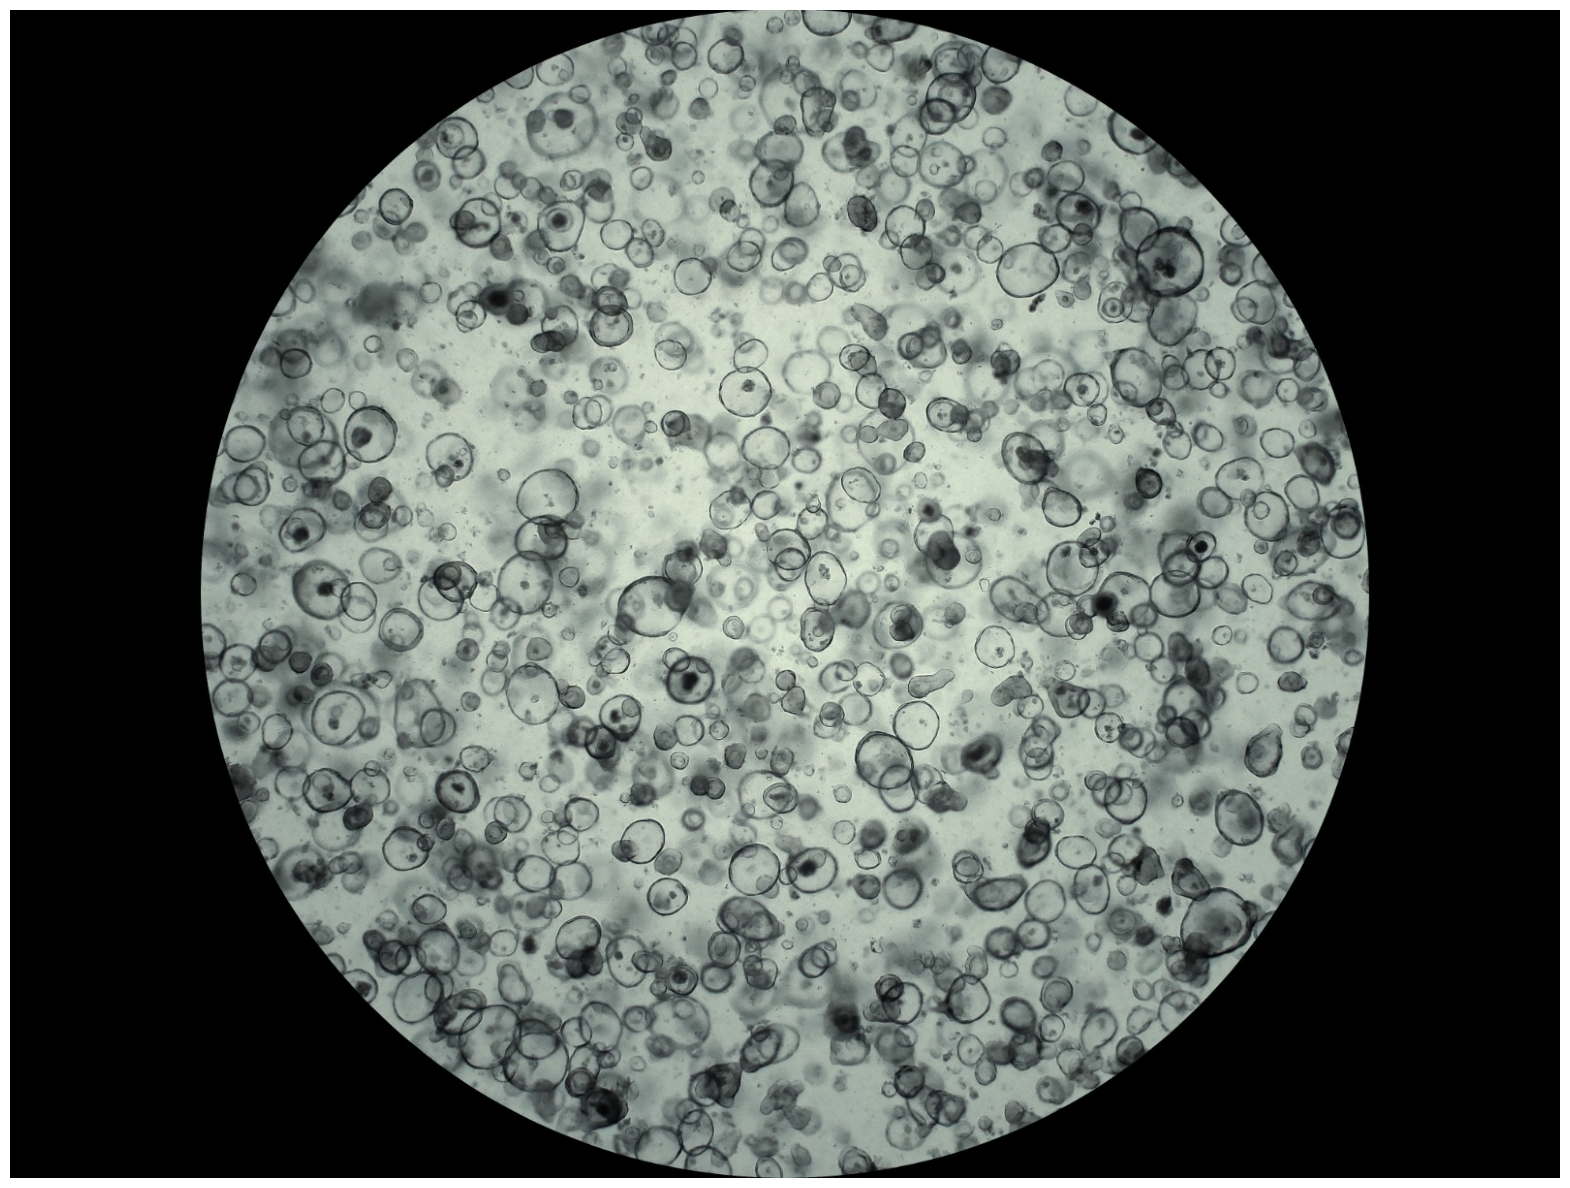

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

### Generating masks

In [40]:
everything_results = model(
    image_path, 
    device=device, 
    retina_masks=True, # parameter determines whether the model uses retina masks for generating segmentation masks.
    imgsz=1800, # sets the input image size to imgsz X imgsz pixels for processing by the model.
    conf=0.2, # sets the minimum confidence threshold for object detection
    iou=0.7, # sets the minimum intersection over union threshold for non-maximum suppression to filter out duplicate detections.
    )
prompt_process = FastSAMPrompt(image_path, everything_results, device=device)

ann = prompt_process.everything_prompt()



WARNING ⚠️ imgsz=[1800] must be multiple of max stride 32, updating to [1824]
image 1/1 /Users/alramalho/workspace/segment-anything-organoids/demo/code/../images/1.jpg: 1376x1824 300 objects, 25545.2ms
Speed: 23.8ms preprocess, 25545.2ms inference, 6243.7ms postprocess per image at shape (1, 3, 1824, 1824)


### Showing Graph

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def show_anns(anns_tensor):
    # Convert tensor to numpy array and iterate through each image
    anns_array = anns_tensor.numpy()

    # Create a blank image to start with
    img = np.ones((anns_array[0].shape[0], anns_array[0].shape[1], 4))
    img[:,:,3] = 0
    for i in range(anns_array.shape[0]):
        segmentation = anns_array[i]
        # Ensure 'segmentation' is boolean
        segmentation = segmentation.astype(bool)
        ax = plt.gca()
        ax.set_autoscale_on(False)

        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[segmentation] = color_mask
    ax.imshow(img)


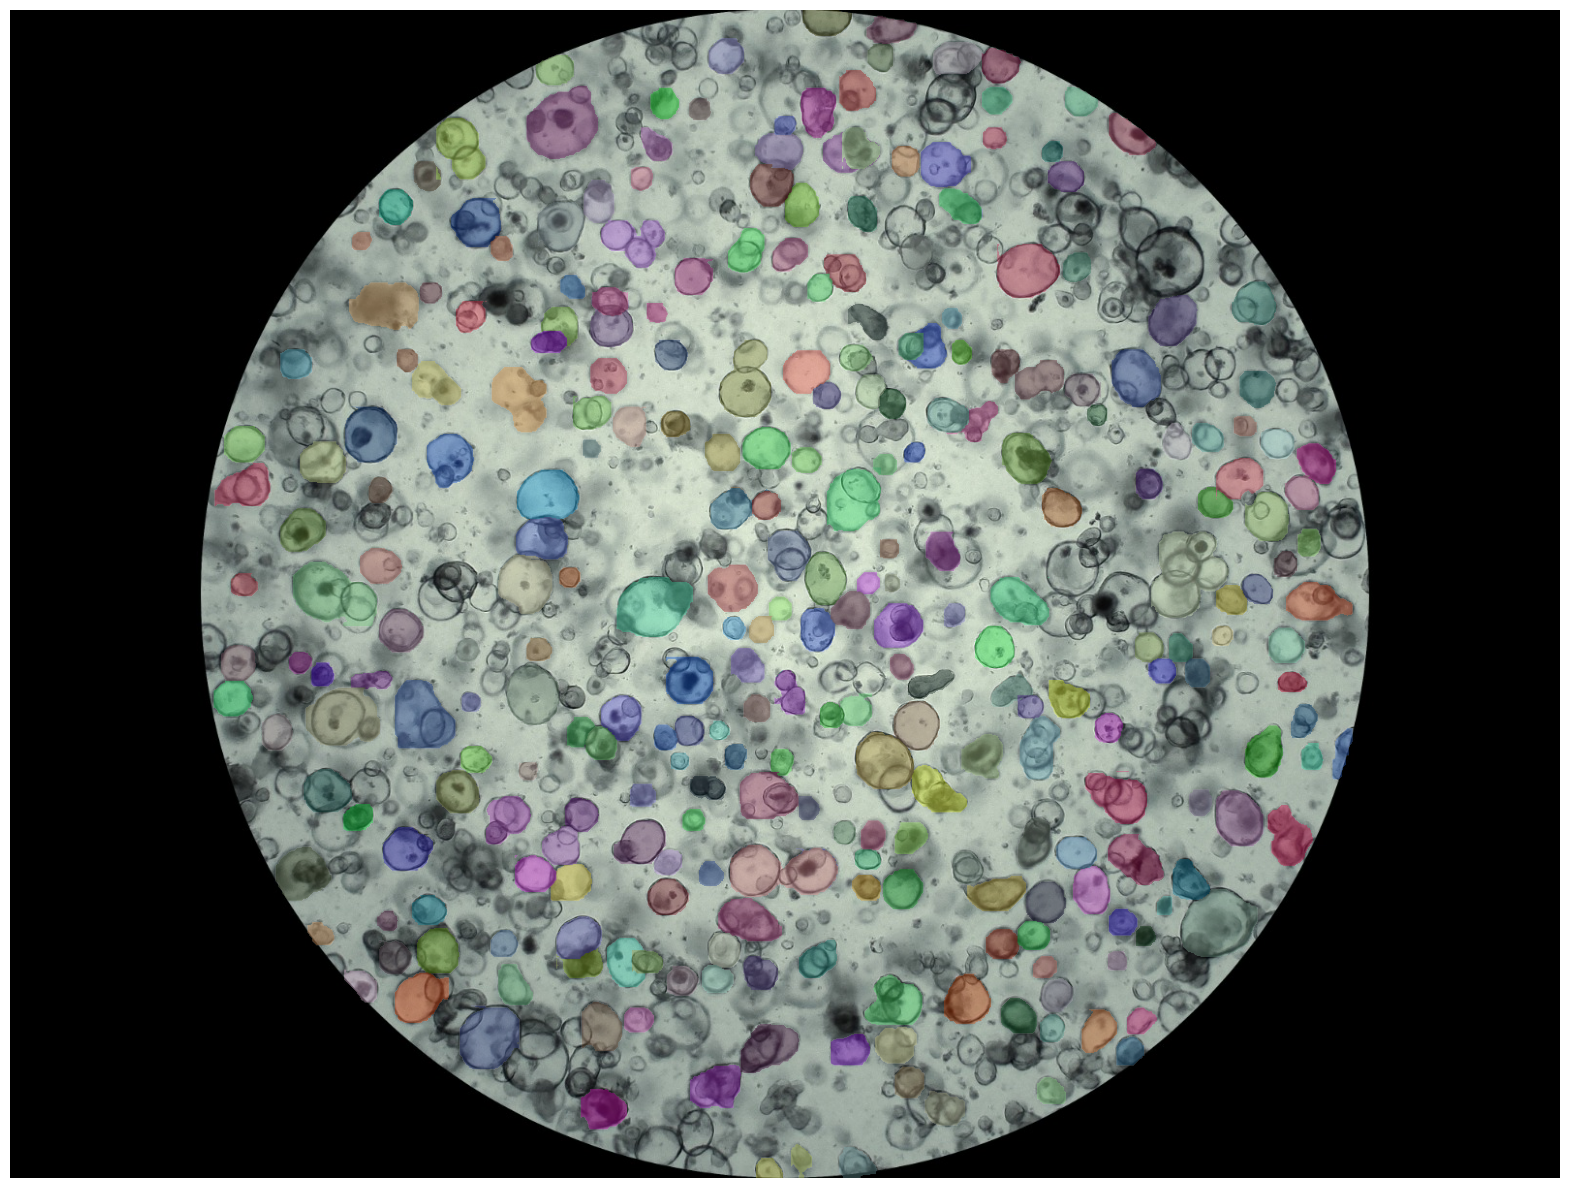

In [41]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(ann)
plt.axis('off')
plt.show() 